# 01. 데이터 로딩 & 기초 EDA
## Olist 프로젝트 Week 1

**목표:**
- Olist 8개 테이블 로드 및 구조 파악
- 데이터 품질 검증 (결측치, 이상치, 중복)
- 기본 통계량 산출
- 테이블 간 관계 확인

**작성일:** 2026-01-12  
**담당:** 데이터 엔지니어

---
## 1. 환경 설정

In [2]:
# 패키지 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
import sys

# 경고 무시
warnings.filterwarnings('ignore')

# 시각화 설정
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('Set2')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# pandas 옵션
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# 프로젝트 루트 경로 추가
sys.path.append(r'C:\Users\82103\Downloads\ICB\project2')

print("✅ 환경 설정 완료!")

✅ 환경 설정 완료!


In [3]:
# 1. 유틸리티 함수 임포트
from src.utils import set_korean_font

# 2. 한글 폰트 설정 호출
set_korean_font()

✅ 한글 폰트 설정 완료 (Windows)


---
## 2. 데이터 로드

In [4]:
# 커스텀 모듈 임포트
from src.data_loader import load_all_tables, get_table_info, check_relationships
from src.utils import check_data_quality, print_quality_report

# 모든 테이블 로드
tables = load_all_tables(verbose=True)

🚀 Olist 데이터 로딩 중...

✅ customers           :  99,441 rows ×  5 columns
✅ geolocation         : 1,000,163 rows ×  5 columns
✅ order_items         : 112,650 rows ×  7 columns
✅ order_payments      : 103,886 rows ×  5 columns
✅ order_reviews       :  99,224 rows ×  7 columns
✅ orders              :  99,441 rows ×  8 columns
✅ products            :  32,951 rows ×  9 columns
✅ sellers             :   3,095 rows ×  4 columns
✅ category_translation:      71 rows ×  2 columns

📊 전체 데이터: 1,550,922 rows



In [5]:
# 개별 테이블 변수 할당
orders = tables['orders']
order_items = tables['order_items']
order_payments = tables['order_payments']
order_reviews = tables['order_reviews']
customers = tables['customers']
sellers = tables['sellers']
products = tables['products']
geolocation = tables['geolocation']
category_translation = tables['category_translation']

print("✅ 테이블 변수 할당 완료!")

✅ 테이블 변수 할당 완료!


---
## 3. 테이블별 기본 정보 확인

### 3.1 Orders 테이블

In [6]:
get_table_info(orders, "Orders")


📊 Orders

✅ Shape: 99,441 rows × 8 columns

📋 Columns:
    1. order_id (object)
    2. customer_id (object)
    3. order_status (object)
    4. order_purchase_timestamp (object)
    5. order_approved_at (object)
    6. order_delivered_carrier_date (object)
    7. order_delivered_customer_date (object)
    8. order_estimated_delivery_date (object)

🔍 Missing Values:
   order_approved_at                       :     160 ( 0.16%)
   order_delivered_carrier_date            :   1,783 ( 1.79%)
   order_delivered_customer_date           :   2,965 ( 2.98%)

📈 Memory Usage: 58.97 MB



In [7]:
# 샘플 데이터 확인
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
# 주문 상태 분포
print("\n주문 상태 분포:")
print(orders['order_status'].value_counts())
print(f"\n주문 상태 종류: {orders['order_status'].nunique()}개")


주문 상태 분포:
order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

주문 상태 종류: 8개


### 3.2 Order Items 테이블

In [9]:
get_table_info(order_items, "Order Items")


📊 Order Items

✅ Shape: 112,650 rows × 7 columns

📋 Columns:
    1. order_id (object)
    2. order_item_id (int64)
    3. product_id (object)
    4. seller_id (object)
    5. shipping_limit_date (object)
    6. price (float64)
    7. freight_value (float64)

🔍 Missing Values:
   ✅ 결측치 없음!

📈 Memory Usage: 39.43 MB



In [10]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### 3.3 Order Reviews 테이블

In [11]:
get_table_info(order_reviews, "Order Reviews")


📊 Order Reviews

✅ Shape: 99,224 rows × 7 columns

📋 Columns:
    1. review_id (object)
    2. order_id (object)
    3. review_score (int64)
    4. review_comment_title (object)
    5. review_comment_message (object)
    6. review_creation_date (object)
    7. review_answer_timestamp (object)

🔍 Missing Values:
   review_comment_title                    :  87,656 (88.34%)
   review_comment_message                  :  58,247 (58.70%)

📈 Memory Usage: 42.75 MB



In [12]:
# 리뷰 점수 분포
print("\n리뷰 점수 분포:")
print(order_reviews['review_score'].value_counts().sort_index())

# 평균 리뷰 점수
avg_score = order_reviews['review_score'].mean()
print(f"\n평균 리뷰 점수: {avg_score:.2f}")


리뷰 점수 분포:
review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: count, dtype: int64

평균 리뷰 점수: 4.09


### 3.4 Customers 테이블

In [13]:
get_table_info(customers, "Customers")


📊 Customers

✅ Shape: 99,441 rows × 5 columns

📋 Columns:
    1. customer_id (object)
    2. customer_unique_id (object)
    3. customer_zip_code_prefix (int64)
    4. customer_city (object)
    5. customer_state (object)

🔍 Missing Values:
   ✅ 결측치 없음!

📈 Memory Usage: 29.62 MB



In [14]:
# 지역별 고객 분포 (상위 10개 주)
print("\n지역별 고객 수 (TOP 10):")
print(customers['customer_state'].value_counts().head(10))


지역별 고객 수 (TOP 10):
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: count, dtype: int64


### 3.5 Sellers 테이블

In [15]:
get_table_info(sellers, "Sellers")


📊 Sellers

✅ Shape: 3,095 rows × 4 columns

📋 Columns:
    1. seller_id (object)
    2. seller_zip_code_prefix (int64)
    3. seller_city (object)
    4. seller_state (object)

🔍 Missing Values:
   ✅ 결측치 없음!

📈 Memory Usage: 0.66 MB



In [16]:
# 지역별 판매자 분포 (상위 10개 주)
print("\n지역별 판매자 수 (TOP 10):")
print(sellers['seller_state'].value_counts().head(10))


지역별 판매자 수 (TOP 10):
seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
Name: count, dtype: int64


---
## 4. 데이터 품질 검증

In [17]:
# 주요 테이블 품질 체크
for name, df in [('Orders', orders), ('Order Items', order_items), 
                  ('Order Reviews', order_reviews), ('Customers', customers)]:
    if df is not None:
        quality = check_data_quality(df, name)
        print_quality_report(quality)


📊 데이터 품질 리포트: Orders

✅ Total Rows: 99,441
✅ Total Columns: 8
✅ Duplicates: 0

⚠️  Missing Values:
   order_approved_at                       :     160 ( 0.16%)
   order_delivered_carrier_date            :   1,783 ( 1.79%)
   order_delivered_customer_date           :   2,965 ( 2.98%)


📊 데이터 품질 리포트: Order Items

✅ Total Rows: 112,650
✅ Total Columns: 7
✅ Duplicates: 0

✅ No Missing Values!


📊 데이터 품질 리포트: Order Reviews

✅ Total Rows: 99,224
✅ Total Columns: 7
✅ Duplicates: 0

⚠️  Missing Values:
   review_comment_title                    :  87,656 (88.34%)
   review_comment_message                  :  58,247 (58.70%)


📊 데이터 품질 리포트: Customers

✅ Total Rows: 99,441
✅ Total Columns: 5
✅ Duplicates: 0

✅ No Missing Values!



---
## 5. 테이블 관계 검증

In [18]:
check_relationships(tables)


🔗 테이블 관계 검증

✅ orders → customers            : 일치 (99,441 keys)
✅ order_items → orders          : 일치 (98,666 keys)
✅ order_items → products        : 일치 (32,951 keys)
✅ order_items → sellers         : 일치 (3,095 keys)
✅ order_payments → orders       : 일치 (99,440 keys)
✅ order_reviews → orders        : 일치 (98,673 keys)



---
## 6. 기초 통계 분석

### 6.1 주문 규모

In [19]:
print("="*60)
print("📊 Olist 비즈니스 규모 (2016-2018)")
print("="*60)

print(f"\n✅ 총 주문 수: {len(orders):,d}")
print(f"✅ 총 고객 수: {customers['customer_unique_id'].nunique():,d}")
print(f"✅ 총 판매자 수: {sellers['seller_id'].nunique():,d}")
print(f"✅ 총 상품 수: {products['product_id'].nunique():,d}")
print(f"\n✅ 평균 리뷰 점수: {order_reviews['review_score'].mean():.2f}")
print(f"✅ 리뷰 작성률: {len(order_reviews) / len(orders) * 100:.1f}%")

📊 Olist 비즈니스 규모 (2016-2018)

✅ 총 주문 수: 99,441
✅ 총 고객 수: 96,096
✅ 총 판매자 수: 3,095
✅ 총 상품 수: 32,951

✅ 평균 리뷰 점수: 4.09
✅ 리뷰 작성률: 99.8%


### 6.2 날짜 컬럼 변환

In [20]:
# 날짜 컬럼 datetime 변환
date_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for col in date_columns:
    if col in orders.columns:
        orders[col] = pd.to_datetime(orders[col], errors='coerce')
        print(f"✅ {col} → datetime 변환")

print("\n✅ 날짜 변환 완료!")

✅ order_purchase_timestamp → datetime 변환
✅ order_approved_at → datetime 변환
✅ order_delivered_carrier_date → datetime 변환
✅ order_delivered_customer_date → datetime 변환
✅ order_estimated_delivery_date → datetime 변환

✅ 날짜 변환 완료!


### 6.3 분석 기간 확인

In [21]:
# 데이터 기간 확인
start_date = orders['order_purchase_timestamp'].min()
end_date = orders['order_purchase_timestamp'].max()

print(f"\n📅 데이터 기간:")
print(f"   시작: {start_date.strftime('%Y-%m-%d')}")
print(f"   종료: {end_date.strftime('%Y-%m-%d')}")
print(f"   기간: {(end_date - start_date).days}일 ({(end_date - start_date).days / 30:.1f}개월)")


📅 데이터 기간:
   시작: 2016-09-04
   종료: 2018-10-17
   기간: 772일 (25.7개월)


---
## 7. 저장

📊 전체 상품 종류: 32,951개


🤝 여러 판매자가 공통 판매 중인 상품: 1,225개
📈 최대 중복 판매 상품의 판매자 수: 8명

[가장 많은 판매자가 붙어있는 상품 TOP 10]


,product_id,unique_seller_count
27128,d285360f29ac7fd97640bf0baef03de0,8
13626,69455f41626a745aea9ee9164cb9eafd,8
13101,656e0eca68dcecf6a31b8ececfabe3e8,7
7131,36f60d45225e60c7da4558b070ce4b60,7
8677,4298b7e67dc399c200662b569563a2b2,7
28327,dbb67791e405873b259e4656bf971246,6
29568,e5ae72c62ebfa708624f5029d609b160,5
24412,be0dbdc3d67d55727a65d4cd696ca73c,5
26856,d04e48982547095af81c231c3d581cb6,5
24770,c0abb5707b6d57b4e7d9797222a77fc8,5


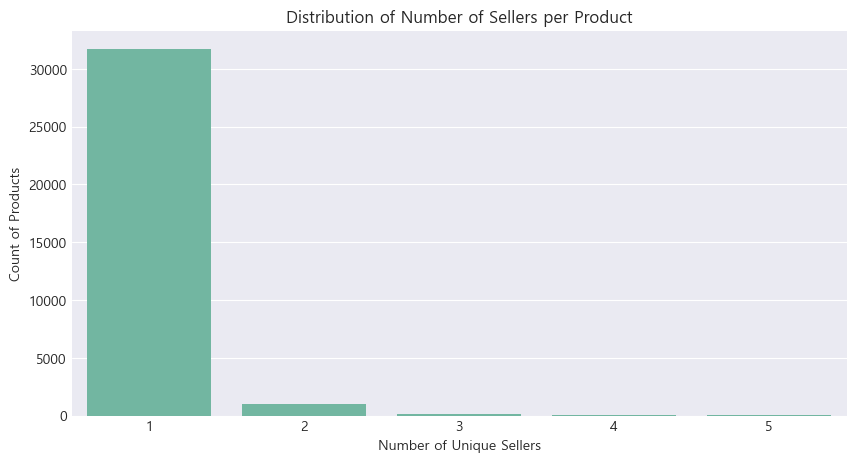

In [22]:
# [추가 분석] 동일 상품을 여러 판매자가 판매하는 경우 조사

# 1. 상품별 고유 판매자 수 계산
product_seller_counts = order_items.groupby('product_id')['seller_id'].nunique().reset_index()
product_seller_counts.columns = ['product_id', 'unique_seller_count']

# 2. 2명 이상의 판매자가 있는 상품 필터링
multi_seller_products = product_seller_counts[product_seller_counts['unique_seller_count'] > 1]

print(f"📊 전체 상품 종류: {len(product_seller_counts):,d}개")
print(f"🤝 여러 판매자가 공통 판매 중인 상품: {len(multi_seller_products):,d}개")
print(f"📈 최대 중복 판매 상품의 판매자 수: {product_seller_counts['unique_seller_count'].max()}명")

# 3. 상위 10개 중복 판매 상품 확인
print("\n[가장 많은 판매자가 붙어있는 상품 TOP 10]")
display(multi_seller_products.sort_values('unique_seller_count', ascending=False).head(10))

# 4. 시각화
plt.figure(figsize=(10, 5))
sns.countplot(data=product_seller_counts[product_seller_counts['unique_seller_count'] <= 5], x='unique_seller_count')
plt.title('Distribution of Number of Sellers per Product')
plt.xlabel('Number of Unique Sellers')
plt.ylabel('Count of Products')
plt.show()

---
## 8. 다음 단계

**Week 1 완료 ✅**

**다음 노트북 (Week 2):**
- `02_delivery_analysis.ipynb`: 배송 시간 분석
- 배송 시간 분포
- 지역별 배송 시간 차이
- 배송 지연 패턴

**확인사항:**
- [ ] 9개 CSV 파일 모두 로드 완료
- [ ] 결측치 패턴 파악
- [ ] 테이블 관계 검증
- [ ] 기본 통계량 확인
- [ ] 날짜 컬럼 변환 완료